# Model Selection & Evaluation

## Muhammad Akbarul Azis - T061661

# Import Package

In [ ]:
import sys
sys.version

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import log, ceil 
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier


In [3]:

import warnings
warnings.filterwarnings('ignore')

In [4]:
%config Completer.use_jedi = False

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import Data

## Load CSV

In [6]:
data = pd.read_csv('credit_risk_dataset.csv')

In [7]:
print('Number of rows:',data.shape[0])
print('Number of columns:',data.shape[1])

Number of rows: 32581
Number of columns: 12


In [8]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [9]:
# data[data.duplicated()]

In [10]:
print(f'Number of duplicated rows {len(data[data.duplicated()])}')

Number of duplicated rows 165


In [11]:
data = data.drop_duplicates()

## Data Exploration

### Columns Type

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


The dataset is composed by `32581` rows (observations) and `12` columns (variables).

- `person_age` : is the age of the person at the time of the loan.
- `person_income`: is the yearly income of the person at the time of the loan.
- `person_home_ownership`: is the type of ownership of the home.
- `person_emp_length`: is the amount of time in years that person is employed.
- `loan_intent`: is the aim of the loan.
- `loan_grade`: is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the collateral, and the likelihood of repayment of the principal and interest.
- `loan_amnt`: is the dimension of the loan taken.
- `loan_int_rate`: is the interest paid for the loan.
- `loan_status`: is a dummy variable where 1 is default, 0 is not default.
- `loan_percent_income`: is the ratio between the loan taken and the annual income.
- `cb_person_default_on_file`: answers whether the person has defaulted before.
-`cb_person_cred_hist_length`: represents the number of years of personal history since the first loan taken from that person.

In [13]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Descriptive Statistics

#### Continuous Variable

In [14]:
pd.options.display.max_rows = 1000
data.describe(include='number').transpose().apply(lambda s: s.apply('{0:.2f}'.format)).T

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.00,32416.00,31529.00,32416.00,29321.00,32416.00,32416.00,32416.00
mean,27.75,66091.64,4.79,9593.85,11.02,0.22,0.17,5.81
std,6.35,62015.58,4.15,6322.73,3.24,0.41,0.11,4.06
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38542.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,79218.00,7.00,12250.00,13.47,0.00,0.23,8.00
max,144.00,6000000.00,123.00,35000.00,23.22,1.00,0.83,30.00


Hampir semua data memiliki `positive skewed` karene mean > median

- terdapat keanehan data pada `person_age` yaitu max > 144, asumsi usia produktif (15-64 tahun), namun ada beberapa yang akan mengajukan kredit pensiun, maka dari itu akan dibatasi sampai `person_age` = 80, lebih > 80 akan didrop nantinya

-  `person_emo_length` juga beberapa akan ada yang didrop apabila `person_emp_length` > `person_age`


#### Categorical Variable

In [15]:
pd.options.display.max_rows = 1000
data.describe(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32416,32416,32416,32416
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16378,6411,10703,26686


# Feature Transformation

## Meta Definition

In [16]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [17]:
target = 'loan_status'
continuous_features =['person_age', 'person_income', 'person_emp_length','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','loan_amnt']
nominal_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'] #cat, #Ticket feature's excluded because of too granular
# discrete_feature = []
# ordinal_cat_features =  []
# ordinal_num_features = []

In [18]:
for x in nominal_features:
    print(len(data[x].value_counts()))
    print(data[x].value_counts()[:,])

4
RENT        16378
MORTGAGE    13369
OWN          2563
OTHER         106
Name: person_home_ownership, dtype: int64
6
EDUCATION            6411
MEDICAL              6042
VENTURE              5682
PERSONAL             5498
DEBTCONSOLIDATION    5189
HOMEIMPROVEMENT      3594
Name: loan_intent, dtype: int64
7
A    10703
B    10387
C     6438
D     3620
E      963
F      241
G       64
Name: loan_grade, dtype: int64
2
N    26686
Y     5730
Name: cb_person_default_on_file, dtype: int64


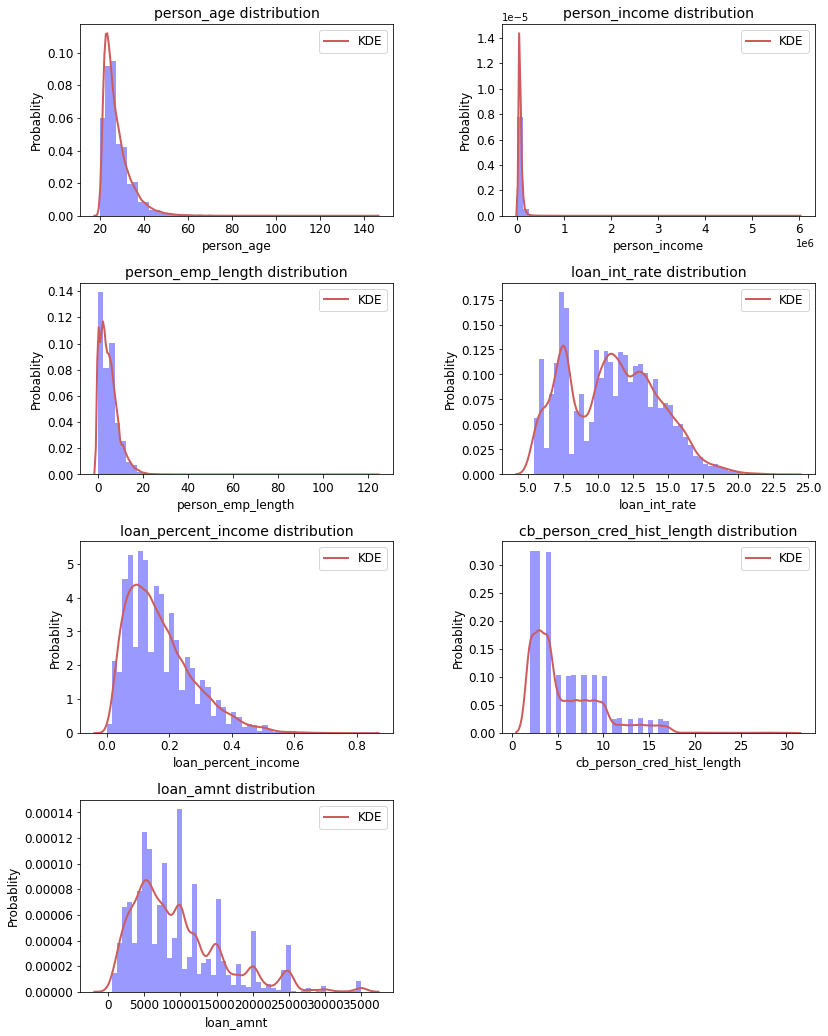

In [19]:

num_cols_hist = data[continuous_features]
plt.figure(figsize=(12,16))

for i, col in enumerate(num_cols_hist.columns):
    idx = int('42'+ str(i+1))
    plt.subplot(idx)
    sns.distplot(num_cols_hist[col], color='blue', 
                 kde_kws={'color': 'indianred', 'lw': 2, 'label': 'KDE'})
    plt.title(col+' distribution', fontsize=14)
    plt.ylabel('Probablity', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['KDE'], prop={"size":12})

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)
plt.show()

## Handling Nan Columns

### Check Columns with NaN

In [20]:
# List Columns with NaN
print('Total columns:',data.shape[1])
print('Total columns with nan:',len(data.columns[data.isna().any()]))

Total columns: 12
Total columns with nan: 2


In [21]:
# Nan Percentage by Column
list_column_nan_data = data[data.columns[data.isnull().any()]].isnull().sum() * 100 / data.shape[0]
list_column_nan_data

person_emp_length    2.736303
loan_int_rate        9.547754
dtype: float64

`person_emp_length` contains 2.75% NaN and `loan_int_rate` contains 9.56% NaN

### Filling Nan Values

In [22]:
list_fill_na = list_column_nan_data[list_column_nan_data<75].index.tolist()
list_fill_na

['person_emp_length', 'loan_int_rate']

In [23]:
list_fill_na_continuous = list(set(continuous_features).intersection(set(list_fill_na)))
list_fill_na_continuous

['person_emp_length', 'loan_int_rate']

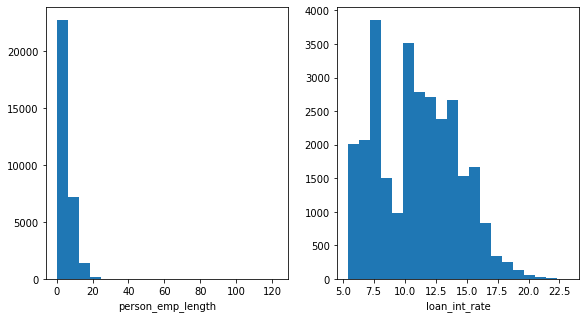

In [24]:
n_cols = 4
n_rows = ceil(len(list_fill_na_continuous)/n_cols)
counter = 1

fig = plt.figure(figsize=(20,5))
for col in list_fill_na_continuous:
    plt.subplot(n_rows, n_cols, counter)
    plt.xlabel(col)
    g = plt.hist(data[col], bins=20)
    
    counter += 1

plt.show();

In [25]:
# check the mode, median for the two features
print(f"person_emp_length mode {data['person_emp_length'].mode()[0]}")
print(f"person_emp_length median {data['person_emp_length'].median()}")
print(f"loan_int_rate mode {data['loan_int_rate'].mode()[0]}")
print(f"loan_int_rate median {data['loan_int_rate'].median()}")

person_emp_length mode 0.0
person_emp_length median 4.0
loan_int_rate mode 7.51
loan_int_rate median 10.99


In [26]:
for i in list_fill_na_continuous:
    data[f'{i}_nan'] = data[i].fillna(data[i].median())

Using median to fill the nan values

In [27]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_emp_length_nan,loan_int_rate_nan
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,123.0,16.02
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,5.0,11.14
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1.0,12.87
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,4.0,15.23
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,8.0,14.27


### Drop Columns

Terdapat beberapa rows yang akan didrop yaitu `person_age` dengan nilai > 80
dan  `person_emo_length` juga beberapa akan ada yang didrop apabila `person_emp_length` > `person_age`

In [28]:
list_drop_person_age = data[data['person_age'] >= 80].index.tolist()
list_drop_person_age

[81, 183, 575, 747, 32297, 32416, 32422, 32506]

In [29]:
data = data.drop(list_drop_person_age, axis=0)

In [30]:
list_drop_emp_length = data[data['person_emp_length'] >= data['person_age']].index.tolist()
list_drop_emp_length

[0, 210]

In [31]:
data = data.drop(list_drop_emp_length, axis=0)
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_emp_length_nan,loan_int_rate_nan
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,5.0,11.14
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1.0,12.87
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,4.0,15.23
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,8.0,14.27
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,2.0,7.14


In [32]:
pd.options.display.max_rows = 1000
data.describe(include='number').transpose().apply(lambda s: s.apply('{0:.2f}'.format)).T

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_emp_length_nan,loan_int_rate_nan
count,32406.00,32406.00,31519.00,32406.00,29313.00,32406.00,32406.00,32406.00,32406.00,32406.00
mean,27.73,65894.74,4.78,9592.66,11.02,0.22,0.17,5.81,4.76,11.01
std,6.19,52519.54,4.04,6321.13,3.24,0.41,0.11,4.05,3.98,3.08
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00,0.00,5.42
25%,23.00,38500.00,2.00,5000.00,7.90,0.00,0.09,3.00,2.00,8.49
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00,4.00,10.99
75%,30.00,79200.00,7.00,12250.00,13.47,0.00,0.23,8.00,7.00,13.11
max,78.00,2039784.00,41.00,35000.00,23.22,1.00,0.83,30.00,41.00,23.22


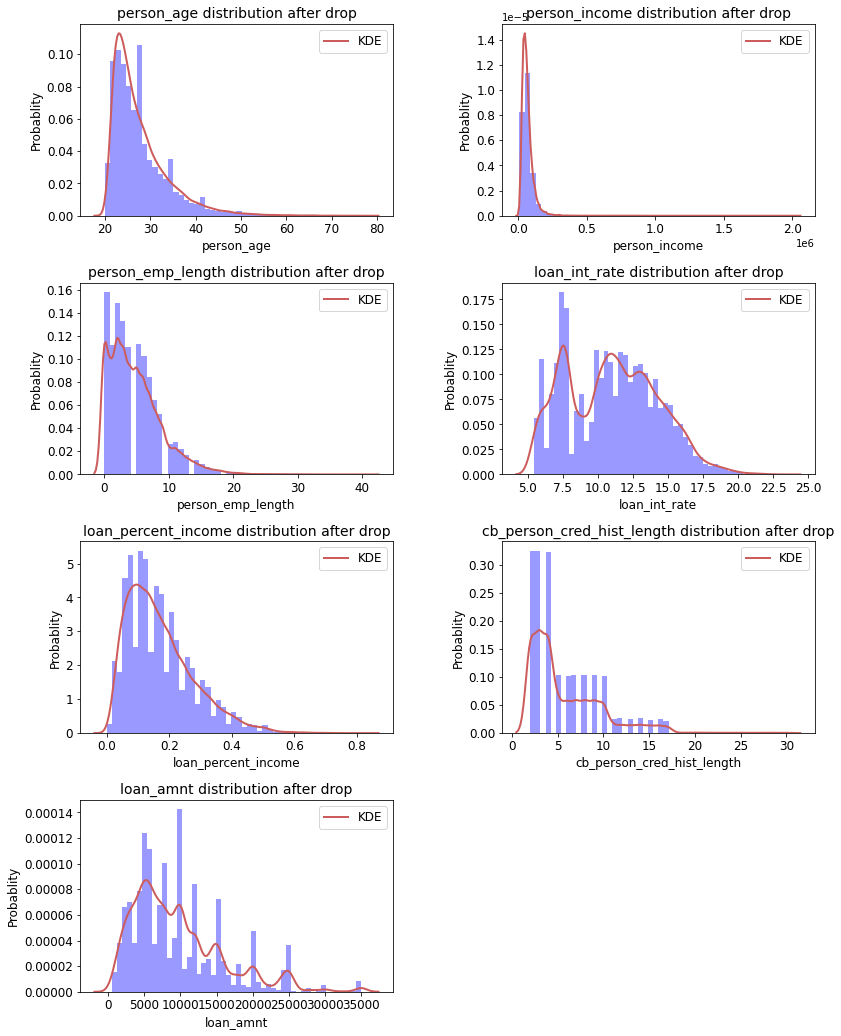

In [33]:

num_cols_hist = data[continuous_features]
plt.figure(figsize=(12,16))

for i, col in enumerate(num_cols_hist.columns):
    idx = int('42'+ str(i+1))
    plt.subplot(idx)
    sns.distplot(num_cols_hist[col], color='blue', 
                 kde_kws={'color': 'indianred', 'lw': 2, 'label': 'KDE'})
    plt.title(col+' distribution after drop', fontsize=14)
    plt.ylabel('Probablity', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['KDE'], prop={"size":12})

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)
plt.show()

## Dummy Variable

In [34]:
data = pd.concat([data,pd.get_dummies(data[nominal_features],
                               drop_first=True)], axis=1).reset_index(drop=True)

In [35]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_emp_length_nan,loan_int_rate_nan,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,5.0,11.14,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1.0,12.87,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,4.0,15.23,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,8.0,14.27,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,2.0,7.14,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32406 entries, 0 to 32405
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   32406 non-null  int64  
 1   person_income                32406 non-null  int64  
 2   person_home_ownership        32406 non-null  object 
 3   person_emp_length            31519 non-null  float64
 4   loan_intent                  32406 non-null  object 
 5   loan_grade                   32406 non-null  object 
 6   loan_amnt                    32406 non-null  int64  
 7   loan_int_rate                29313 non-null  float64
 8   loan_status                  32406 non-null  int64  
 9   loan_percent_income          32406 non-null  float64
 10  cb_person_default_on_file    32406 non-null  object 
 11  cb_person_cred_hist_length   32406 non-null  int64  
 12  person_emp_length_nan        32406 non-null  float64
 13  loan_int_rate_na

## Handling Outliers

## WOE

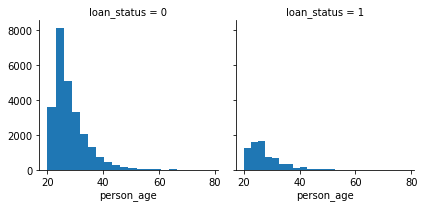

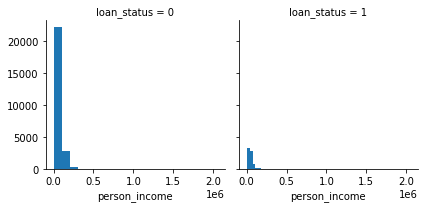

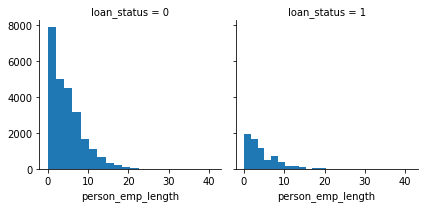

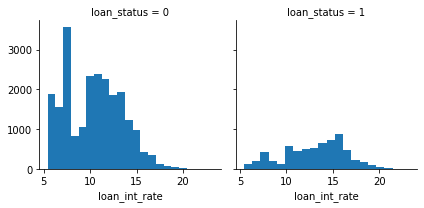

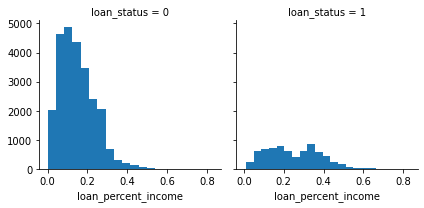

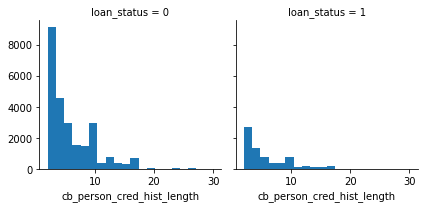

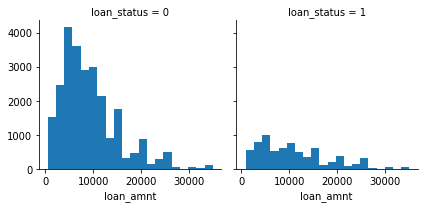

In [37]:
for i in continuous_features:
    g = sns.FacetGrid(data[data[target].notnull()], col=target)
    g.map(plt.hist, i, bins=20)

In [38]:
continuous_features

['person_age',
 'person_income',
 'person_emp_length',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_amnt']

In [39]:
feature = 'person_age'
b=[-float("inf"),  24, 28, float("inf")]
feature = feature
binning = b

bin_feature = pd.cut(data[feature], bins=binning).values.add_categories('Nan').fillna('Nan')
data_woe_iv = (pd.crosstab(bin_feature,data[target],normalize='columns')
             .assign(woe=lambda datax: np.log(datax[1] / datax[0]))
             .assign(iv=lambda datax: np.sum(datax['woe']*
                                           (datax[1]-datax[0]))))

display(data_woe_iv)

loan_status,0,1,woe,iv
row_0,,,,
"(-inf, 24.0]",0.370013,0.402370,0.083833,0.005179
"(24.0, 28.0]",0.292914,0.288375,-0.015619,0.005179
"(28.0, inf]",0.337072,0.309255,-0.086131,0.005179


In [40]:
data[f'{feature}_WOE'] = pd.cut(data[feature], bins=binning, labels=[0.0802, -0.015, -0.008])
data[f'{feature}_WOE'] = data[f'{feature}_WOE'].values.add_categories('Nan').fillna('Nan') 
data[f'{feature}_WOE'] = data[f'{feature}_WOE'].replace('Nan', 0)
data[f'{feature}_WOE'] = data[f'{feature}_WOE'].astype(float)

In [41]:
feature = 'person_income'
b=[-float("inf"),  40000, 44004, 70000, float("inf")]
feature = feature
binning = b

bin_feature = pd.cut(data[feature], bins=binning).values.add_categories('Nan').fillna('Nan')
data_woe_iv = (pd.crosstab(bin_feature,data[target],normalize='columns')
             .assign(woe=lambda datax: np.log(datax[1] / datax[0]))
             .assign(iv=lambda datax: np.sum(datax['woe']*
                                           (datax[1]-datax[0]))))

display(data_woe_iv)

loan_status,0,1,woe,iv
row_0,,,,
"(-inf, 40000.0]",0.226716,0.491253,0.773260,0.388999
"(40000.0, 44004.0]",0.045975,0.060243,0.270279,0.388999
"(44004.0, 70000.0]",0.360139,0.283860,-0.238009,0.388999
"(70000.0, inf]",0.367170,0.164644,-0.802035,0.388999


In [42]:
data[f'{feature}_WOE'] = pd.cut(data[feature], bins=binning, labels=[0.773, 0.265, -0.2391, -0.802])
data[f'{feature}_WOE'] = data[f'{feature}_WOE'].values.add_categories('Nan').fillna('Nan') 
data[f'{feature}_WOE'] = data[f'{feature}_WOE'].replace('Nan', 0)
data[f'{feature}_WOE'] = data[f'{feature}_WOE'].astype(float)

In [43]:
feature = 'person_emp_length'
b=[-float("inf"),  0, 2, 6, float("inf")]
feature = feature
binning = b

bin_feature = pd.cut(data[feature], bins=binning).values.add_categories('Nan').fillna('Nan')
data_woe_iv = (pd.crosstab(bin_feature,data[target],normalize='columns')
             .assign(woe=lambda datax: np.log(datax[1] / datax[0]))
             .assign(iv=lambda datax: np.sum(datax['woe']*
                                           (datax[1]-datax[0]))))

display(data_woe_iv)

loan_status,0,1,woe,iv
row_0,,,,
"(-inf, 0.0]",0.116241,0.161258,0.327339,0.064759
"(0.0, 2.0]",0.194960,0.252540,0.258773,0.064759
"(2.0, 6.0]",0.376491,0.331405,-0.127552,0.064759
"(6.0, inf]",0.288372,0.215152,-0.292905,0.064759
Nan,0.023936,0.039644,0.504587,0.064759


In [44]:
data[f'{feature}_WOE'] = pd.cut(data[feature], bins=binning, labels=[0.329, 0.257, -0.128, -0.291])
data[f'{feature}_WOE'] = data[f'{feature}_WOE'].values.add_categories('Nan').fillna('Nan') 
data[f'{feature}_WOE'] = data[f'{feature}_WOE'].replace('Nan', 0.499)
data[f'{feature}_WOE'] = data[f'{feature}_WOE'].astype(float)

In [45]:
feature = 'loan_int_rate'
b=[-float("inf"),  5.5, 9.3, 12.6, float("inf")]
feature = feature
binning = b

bin_feature = pd.cut(data[feature], bins=binning).values.add_categories('Nan').fillna('Nan')
data_woe_iv = (pd.crosstab(bin_feature,data[target],normalize='columns')
             .assign(woe=lambda datax: np.log(datax[1] / datax[0]))
             .assign(iv=lambda datax: np.sum(datax['woe']*
                                           (datax[1]-datax[0]))))

display(data_woe_iv)

loan_status,0,1,woe,iv
row_0,,,,
"(-inf, 5.5]",0.022040,0.004233,-1.650049,0.473154
"(5.5, 9.3]",0.318469,0.130502,-0.892135,0.473154
"(9.3, 12.6]",0.323169,0.233352,-0.325628,0.473154
"(12.6, inf]",0.239474,0.541479,0.815859,0.473154
Nan,0.096848,0.090435,-0.068517,0.473154


In [46]:
data[f'{feature}_WOE'] = pd.cut(data[feature], bins=binning, labels=[-0.166, -0.886, -0.327, 0.817])
data[f'{feature}_WOE'] = data[f'{feature}_WOE'].values.add_categories('Nan').fillna('Nan') 
data[f'{feature}_WOE'] = data[f'{feature}_WOE'].replace('Nan', -0.068)
data[f'{feature}_WOE'] = data[f'{feature}_WOE'].astype(float)

In [47]:
feature = 'loan_percent_income'
b=[-float("inf"),  0.1, 0.11, 0.2, float("inf")]
binning = b

bin_feature = pd.cut(data[feature], bins=binning).values.add_categories('Nan').fillna('Nan')
data_woe_iv = (pd.crosstab(bin_feature,data[target],normalize='columns')
             .assign(woe=lambda datax: np.log(datax[1] / datax[0]))
             .assign(iv=lambda datax: np.sum(datax['woe']*
                                           (datax[1]-datax[0]))))

display(data_woe_iv)

loan_status,0,1,woe,iv
row_0,,,,
"(-inf, 0.1]",0.363378,0.172968,-0.742334,0.508279
"(0.1, 0.11]",0.047279,0.024831,-0.643977,0.508279
"(0.11, 0.2]",0.354886,0.231236,-0.428358,0.508279
"(0.2, inf]",0.234458,0.570965,0.890053,0.508279


In [48]:
data[f'{feature}_WOE'] = pd.cut(data[feature], bins=binning, labels=[-0.742, -0.639, -0.427, 0.889])
data[f'{feature}_WOE'] = data[f'{feature}_WOE'].values.add_categories('Nan').fillna('Nan') 
data[f'{feature}_WOE'] = data[f'{feature}_WOE'].replace('Nan', 0)
data[f'{feature}_WOE'] = data[f'{feature}_WOE'].astype(float)

In [49]:
feature = 'cb_person_cred_hist_length'
b=[-float("inf"),  2,3,7, float("inf")]
binning = b

bin_feature = pd.cut(data[feature], bins=binning).values.add_categories('Nan').fillna('Nan')
data_woe_iv = (pd.crosstab(bin_feature,data[target],normalize='columns')
             .assign(woe=lambda datax: np.log(datax[1] / datax[0]))
             .assign(iv=lambda datax: np.sum(datax['woe']*
                                           (datax[1]-datax[0]))))

display(data_woe_iv)

loan_status,0,1,woe,iv
row_0,,,,
"(-inf, 2.0]",0.178529,0.198081,0.103926,0.003322
"(2.0, 3.0]",0.180978,0.186230,0.028609,0.003322
"(3.0, 7.0]",0.356861,0.347912,-0.025396,0.003322
"(7.0, inf]",0.283632,0.267777,-0.057526,0.003322


In [50]:
data[f'{feature}_WOE'] = pd.cut(data[feature], bins=binning, labels=[0.1, 0.026, -0.0244, -0.054])
data[f'{feature}_WOE'] = data[f'{feature}_WOE'].values.add_categories('Nan').fillna('Nan') 
data[f'{feature}_WOE'] = data[f'{feature}_WOE'].replace('Nan', 0)
data[f'{feature}_WOE'] = data[f'{feature}_WOE'].astype(float)

In [51]:
feature = 'loan_amnt'
b=[-float("inf"),  6000,10500, float("inf")]
binning = b

bin_feature = pd.cut(data[feature], bins=binning).values.add_categories('Nan').fillna('Nan')
data_woe_iv = (pd.crosstab(bin_feature,data[target],normalize='columns')
             .assign(woe=lambda datax: np.log(datax[1] / datax[0]))
             .assign(iv=lambda datax: np.sum(datax['woe']*
                                           (datax[1]-datax[0]))))

display(data_woe_iv)

loan_status,0,1,woe,iv
row_0,,,,
"(-inf, 6000.0]",0.386405,0.330135,-0.157383,0.052256
"(6000.0, 10500.0]",0.305000,0.251834,-0.191543,0.052256
"(10500.0, inf]",0.308595,0.418030,0.303526,0.052256


In [52]:
data[f'{feature}_WOE'] = pd.cut(data[feature], bins=binning, labels=[-0.1556, -0.192, 0.302])
data[f'{feature}_WOE'] = data[f'{feature}_WOE'].values.add_categories('Nan').fillna('Nan') 
data[f'{feature}_WOE'] = data[f'{feature}_WOE'].replace('Nan', 0)
data[f'{feature}_WOE'] = data[f'{feature}_WOE'].astype(float)

In [53]:
nominal_features

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [54]:
feature = 'person_home_ownership'
data_woe_iv = (pd.crosstab(data[feature].fillna('Nan'),data[target],
                      normalize='columns')
             .assign(woe=lambda datax: np.log(datax[1] / datax[0]))
             .assign(iv=lambda datax: np.sum(datax['woe']*
                                           (datax[1]-datax[0]))))

data_woe_iv

loan_status,0,1,woe,iv
person_home_ownership,,,,
MORTGAGE,0.461253,0.238008,-0.661643,0.375598
OTHER,0.002883,0.004656,0.479161,0.375598
OWN,0.093649,0.027088,-1.240459,0.375598
RENT,0.442215,0.730248,0.501588,0.375598


In [55]:
data[f'{feature}_WOE'] = np.where(data[feature].isin(['MORTAGE']), -0.682, 
                  np.where(data[feature].isin(['OTHER']), 0.468, 
                  np.where(data[feature].isin(['OWN']), -1.24, 
                 np.where(data[feature].isin(['RENT']), 0.502, 0))))

In [56]:
feature = 'loan_intent'
data_woe_iv = (pd.crosstab(data[feature].fillna('Nan'),data[target],
                      normalize='columns')
             .assign(woe=lambda datax: np.log(datax[1] / datax[0]))
             .assign(iv=lambda datax: np.sum(datax['woe']*
                                           (datax[1]-datax[0]))))

data_woe_iv

loan_status,0,1,woe,iv
loan_intent,,,,
DEBTCONSOLIDATION,0.146181,0.209932,0.361942,0.095919
EDUCATION,0.209456,0.156038,-0.294410,0.095919
HOMEIMPROVEMENT,0.104827,0.132619,0.235169,0.095919
MEDICAL,0.174698,0.228132,0.266867,0.095919
PERSONAL,0.173868,0.154204,-0.120020,0.095919
VENTURE,0.190971,0.119074,-0.472372,0.095919


In [57]:
data[f'{feature}_WOE'] = np.where(data[feature].isin(['DEBTCONSOLIDATION']), 0.360, 
                  np.where(data[feature].isin(['EDUCATION']), -0.293, 
                  np.where(data[feature].isin(['HOMEIMPROVEMENT']), 0.2355, 
                 np.where(data[feature].isin(['MEDICAL']), 0.267, 
                np.where(data[feature].isin(['PERSONAL']), -0.117,
                np.where(data[feature].isin(['VENTURE']), -0.472,0))))))

In [58]:
feature = 'loan_grade'
data_woe_iv = (pd.crosstab(data[feature].fillna('Nan'),data[target],
                      normalize='columns')
             .assign(woe=lambda datax: np.log(datax[1] / datax[0]))
             .assign(iv=lambda datax: np.sum(datax['woe']*
                                           (datax[1]-datax[0]))))

data_woe_iv

loan_status,0,1,woe,iv
loan_grade,,,,
A,0.380559,0.150395,-0.928377,0.882274
B,0.343155,0.239137,-0.361148,0.882274
C,0.201398,0.188488,-0.066252,0.882274
D,0.058535,0.301495,1.639123,0.882274
E,0.013508,0.087613,1.869633,0.882274
F,0.002804,0.023984,2.146231,0.882274
G,0.000039,0.008888,5.416247,0.882274


In [59]:
data[f'{feature}_WOE'] = np.where(data[feature].isin(['A']), -0.925, 
                  np.where(data[feature].isin(['B']), -0.361, 
                  np.where(data[feature].isin(['C']), -0.064, 
                 np.where(data[feature].isin(['D']), 1.64, 
                np.where(data[feature].isin(['E']), 1.87,
                np.where(data[feature].isin(['F']), 2.14,
                         np.where(data[feature].isin(['G']), 5.41,0)))))))

In [60]:
feature = 'cb_person_default_on_file'
data_woe_iv = (pd.crosstab(data[feature].fillna('Nan'),data[target],
                      normalize='columns')
             .assign(woe=lambda datax: np.log(datax[1] / datax[0]))
             .assign(iv=lambda datax: np.sum(datax['woe']*
                                           (datax[1]-datax[0]))))

data_woe_iv

loan_status,0,1,woe,iv
cb_person_default_on_file,,,,
N,0.859389,0.69399,-0.213764,0.163973
Y,0.140611,0.30601,0.777618,0.163973


In [61]:
data[f'{feature}_WOE'] = np.where(data[feature].isin(['N']), -0.213, 
                  np.where(data[feature].isin(['Y']), -0.778, 0))

In [62]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_emp_length_nan,loan_int_rate_nan,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,person_age_WOE,person_income_WOE,person_emp_length_WOE,loan_int_rate_WOE,loan_percent_income_WOE,cb_person_cred_hist_length_WOE,loan_amnt_WOE,person_home_ownership_WOE,loan_intent_WOE,loan_grade_WOE,cb_person_default_on_file_WOE
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,5.0,11.14,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0.0802,0.7730,-0.128,-0.327,-0.742,0.1000,-0.1556,-1.240,-0.293,-0.361,-0.213
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1.0,12.87,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,-0.0150,0.7730,0.257,0.817,0.889,0.0260,-0.1556,0.000,0.267,-0.064,-0.213
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,4.0,15.23,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0.0802,-0.2391,-0.128,0.817,0.889,0.1000,0.3020,0.502,0.267,-0.064,-0.213
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,8.0,14.27,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0.0802,-0.2391,-0.291,0.817,0.889,-0.0244,0.3020,0.502,0.267,-0.064,-0.778
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,2.0,7.14,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0802,0.7730,0.257,-0.886,0.889,0.1000,-0.1556,-1.240,-0.472,-0.925,-0.213


In [63]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'person_emp_length_nan', 'loan_int_rate_nan',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_B',
       'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F',
       'loan_grade_G', 'cb_person_default_on_file_Y', 'person_age_WOE',
       'person_income_WOE', 'person_emp_length_WOE', 'loan_int_rate_WOE',
       'loan_percent_income_WOE', 'cb_person_cred_hist_length_WOE',
       'loan_amnt_WOE', 'person_home_ownership_WOE', 'loan_intent_WOE',
       'loan_grade_WOE', 'cb_person_default_on_file_WOE'],
      dtyp

In [64]:
woe_features = ['person_age_WOE',
       'person_income_WOE', 'person_emp_length_WOE', 'loan_int_rate_WOE',
       'loan_percent_income_WOE', 'cb_person_cred_hist_length_WOE',
       'loan_amnt_WOE', 'person_home_ownership_WOE', 'loan_intent_WOE',
       'loan_grade_WOE', 'cb_person_default_on_file_WOE']

# Sample Splitting

In [65]:
train_set = data[data[target].notnull()]
test_set = data[data[target].notnull()]

In [66]:
train_x, holdout_x, train_y, holdout_y = train_test_split(
                                                            data[data.columns.difference([target])],
#                                                             train_set[train_set.columns.difference(['Log_SalePrice'])],
                                                            train_set[[target]],
#                                                             train_set[['Log_SalePrice']],
                                                            train_size=0.80, 
                                                            test_size=0.20, random_state=1245)

In [67]:
data_train = pd.concat([train_x, train_y], axis=1)
data_holdout = pd.concat([holdout_x, holdout_y], axis=1)

In [68]:
print('Number of columns and row data train:',data_train.shape)
print('Number of columns and row data validate:',data_holdout.shape)

Number of columns and row data train: (25924, 40)
Number of columns and row data validate: (6482, 40)


In [69]:
data_train_set = data_train[data_train[target].notnull()]
data_valid_set = data_train[data_train[target].notnull()]

In [70]:
train_set_x, valid_x, train_set_y, valid_y = train_test_split(
                                                            data_train[data_train.columns.difference([target])],
#                                                             train_set[train_set.columns.difference(['Log_SalePrice'])],
                                                            data_train[[target]],
#                                                             train_set[['Log_SalePrice']],
                                                            train_size=0.80, 
                                                            test_size=0.20, random_state=1245)

In [71]:
data_train_set = pd.concat([train_set_x, train_set_y], axis=1)
data_valid_set = pd.concat([valid_x, valid_y], axis=1)

In [72]:
print('Number of columns and row data train:',data_train_set.shape)
print('Number of columns and row data validate:',data_valid_set.shape)

Number of columns and row data train: (20739, 40)
Number of columns and row data validate: (5185, 40)


# Feature Selection

In [73]:
from sklearn.pipeline import Pipeline

## L1 Regularization

In [74]:
pipe = Pipeline([('classifier' , LogisticRegression())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4,4,100),
    'classifier__solver' : ['liblinear']}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(train_set_x[woe_features], train_set_y.values.ravel())

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [75]:
best_clf.best_estimator_

Pipeline(steps=[('classifier',
                 LogisticRegression(C=1.592282793341094, penalty='l1',
                                    solver='liblinear'))])

In [76]:
selector = SelectFromModel(estimator=best_clf.best_estimator_.named_steps['classifier'])
selector.fit(train_x[woe_features], train_y)
feature_importance_df = pd.DataFrame(
    {
        'feature': train_x[woe_features].columns,
        'importance': abs(selector.estimator_.coef_)[0],
        'selected': selector.get_support()
    }
)
select_from_model = feature_importance_df[feature_importance_df['selected']].sort_values(by='importance', ascending=False)
select_from_model

,feature,importance,selected
7,person_home_ownership_WOE,1.326734,True
8,loan_intent_WOE,1.271266,True
9,loan_grade_WOE,1.199796,True
1,person_income_WOE,1.047814,True
6,loan_amnt_WOE,1.006852,True
5,cb_person_cred_hist_length_WOE,0.943330,True
4,loan_percent_income_WOE,0.725599,True
2,person_emp_length_WOE,0.653650,True
0,person_age_WOE,0.215180,True
3,loan_int_rate_WOE,0.137016,True


## Feature Importance

In [77]:
selector_rf = SelectFromModel(estimator=RandomForestClassifier(), threshold=0.005)
selector_rf.fit(train_set_x[woe_features], train_set_y)
feature_importance_df_rf = pd.DataFrame(
    {
        'feature': train_set_x[woe_features].columns,
        'importance': abs(selector_rf.estimator_.feature_importances_),
        'selected': selector_rf.get_support()
    }
)
select_from_model_rf = feature_importance_df_rf[feature_importance_df_rf['selected']].sort_values(by='importance', ascending=False)
select_from_model_rf

,feature,importance,selected
9,loan_grade_WOE,0.183592,True
8,loan_intent_WOE,0.165887,True
2,person_emp_length_WOE,0.111551,True
7,person_home_ownership_WOE,0.096558,True
4,loan_percent_income_WOE,0.096529,True
5,cb_person_cred_hist_length_WOE,0.079183,True
1,person_income_WOE,0.074637,True
3,loan_int_rate_WOE,0.066904,True
0,person_age_WOE,0.051525,True
6,loan_amnt_WOE,0.050455,True


## Target Distribution

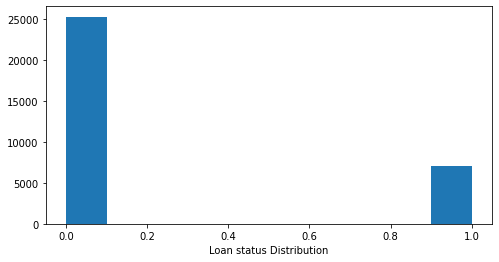

In [78]:
fig = plt.figure(figsize=(8,4))
plt.xlabel('Loan status Distribution')
plt.hist(data[target]);

In [79]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
def print_evaluate(true, predicted):
    auc = metrics.roc_auc_score(true, predicted)
    accuracy = metrics.accuracy_score(true, predicted)
    print('Accuracy:', accuracy)
    print('AUC:', auc)
    print('__________________________________')
    
def evaluate(true, predicted):
    auc = metrics.roc_auc_score(true, predicted)
    accuracy = metrics.accuracy_score(true, predicted)
    return accuracy, auc

## Logistic Regression

In [80]:
woe_features

['person_age_WOE',
 'person_income_WOE',
 'person_emp_length_WOE',
 'loan_int_rate_WOE',
 'loan_percent_income_WOE',
 'cb_person_cred_hist_length_WOE',
 'loan_amnt_WOE',
 'person_home_ownership_WOE',
 'loan_intent_WOE',
 'loan_grade_WOE',
 'cb_person_default_on_file_WOE']

### LOG REG WOE

In [81]:
train_woe = train_set_x[woe_features]
validate_woe = valid_x[woe_features]
holdout_woe = holdout_x[woe_features]

In [82]:
logreg_opt =  LogisticRegression(solver = 'liblinear',
                                C=1.592282793341094,
                                 random_state = 64,
                                 n_jobs = -1)
logreg_opt.fit(train_woe, train_set_y)

LogisticRegression(C=1.592282793341094, n_jobs=-1, random_state=64,
                   solver='liblinear')

In [83]:
test_pred = logreg_opt.predict(validate_woe)
train_pred = logreg_opt.predict(train_woe)
holdout_pred = logreg_opt.predict(holdout_woe)

print('Test set evaluation:\n_____________________________________')
print_evaluate(valid_y, test_pred)
print(classification_report(valid_y, 
                            test_pred))
print('Train set evaluation:\n_____________________________________')
print_evaluate(train_set_y, train_pred)
print(classification_report(train_set_y, 
                            train_pred))
print('Holdout set evaluation:\n_____________________________________')
print_evaluate(holdout_y, holdout_pred)
print(classification_report(holdout_y, 
                            holdout_pred))

Test set evaluation:
_____________________________________
Accuracy: 0.8406943105110897
AUC: 0.6974694839125581
__________________________________
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4056
           1       0.72      0.44      0.55      1129

    accuracy                           0.84      5185
   macro avg       0.79      0.70      0.73      5185
weighted avg       0.83      0.84      0.83      5185

Train set evaluation:
_____________________________________
Accuracy: 0.846279955639134
AUC: 0.7107190087988874
__________________________________
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     16188
           1       0.73      0.47      0.57      4551

    accuracy                           0.85     20739
   macro avg       0.80      0.71      0.74     20739
weighted avg       0.84      0.85      0.83     20739

Holdout set evaluation:
____________________________

In [84]:
index = pd.MultiIndex.from_product([['Train', 'Valid', 'Holdout Sample'], ['Accuracy', 'AUC']])
result_logreg_WOE_opt = pd.DataFrame([pd.DataFrame({'Train' : list(evaluate(train_set_y, train_pred)),
             'Valid' : list(evaluate(valid_y, test_pred)), 'Holdout Sample' : list(evaluate(holdout_y, holdout_pred))}).unstack().values], columns=index)
result_logreg_WOE_opt.insert(loc=0, column='Model', value = 'LogReg WOE OPT')
result_logreg_WOE_opt

Model    Train               Valid           Holdout Sample  \
                  Accuracy       AUC  Accuracy       AUC       Accuracy   
0  LogReg WOE OPT  0.84628  0.710719  0.840694  0.697469       0.848504   

             
        AUC  
0  0.710803

### LOG REG NOT WOE

In [85]:
train_woe_cat = train_set_x[['person_age',
 'person_income',
 'person_emp_length_nan',
 'loan_int_rate_nan',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_amnt', 'person_home_ownership_WOE',
 'loan_intent_WOE',
 'loan_grade_WOE',
 'cb_person_default_on_file_WOE']]
validate_woe_cat = valid_x[['person_age',
 'person_income',
 'person_emp_length_nan',
 'loan_int_rate_nan',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_amnt', 'person_home_ownership_WOE',
 'loan_intent_WOE',
 'loan_grade_WOE',
 'cb_person_default_on_file_WOE']]
holdout_woe_cat = holdout_x[['person_age',
 'person_income',
 'person_emp_length_nan',
 'loan_int_rate_nan',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_amnt', 'person_home_ownership_WOE',
 'loan_intent_WOE',
 'loan_grade_WOE',
 'cb_person_default_on_file_WOE']]

In [86]:
logreg_opt =  LogisticRegression(solver = 'liblinear',
                                C=1.592282793341094,
                                 random_state = 64,
                                 n_jobs = -1)
logreg_opt.fit(train_woe_cat, train_set_y)

LogisticRegression(C=1.592282793341094, n_jobs=-1, random_state=64,
                   solver='liblinear')

In [87]:
test_pred = logreg_opt.predict(validate_woe_cat)
train_pred = logreg_opt.predict(train_woe_cat)
holdout_pred = logreg_opt.predict(holdout_woe_cat)

print('Test set evaluation:\n_____________________________________')
print_evaluate(valid_y, test_pred)
print(classification_report(valid_y, 
                            test_pred))
print('Train set evaluation:\n_____________________________________')
print_evaluate(train_set_y, train_pred)
print(classification_report(train_set_y, 
                            train_pred))
print('Holdout set evaluation:\n_____________________________________')
print_evaluate(holdout_y, holdout_pred)
print(classification_report(holdout_y, 
                            holdout_pred))

Test set evaluation:
_____________________________________
Accuracy: 0.8123432979749277
AUC: 0.5952945302522873
__________________________________
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      4056
           1       0.74      0.21      0.33      1129

    accuracy                           0.81      5185
   macro avg       0.78      0.60      0.61      5185
weighted avg       0.80      0.81      0.77      5185

Train set evaluation:
_____________________________________
Accuracy: 0.8159024060947973
AUC: 0.601540135119661
__________________________________
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     16188
           1       0.79      0.22      0.34      4551

    accuracy                           0.82     20739
   macro avg       0.80      0.60      0.62     20739
weighted avg       0.81      0.82      0.77     20739

Holdout set evaluation:
____________________________

In [88]:
index = pd.MultiIndex.from_product([['Train', 'Valid', 'Holdout Sample'], ['Accuracy', 'AUC']])
result_logreg_WOE_cat = pd.DataFrame([pd.DataFrame({'Train' : list(evaluate(train_set_y, train_pred)),
             'Valid' : list(evaluate(valid_y, test_pred)), 'Holdout Sample' : list(evaluate(holdout_y, holdout_pred))}).unstack().values], columns=index)
result_logreg_WOE_cat.insert(loc=0, column='Model', value = 'LogReg OPT WOE CAT')
result_logreg_WOE_cat

Model     Train              Valid           Holdout Sample  \
                       Accuracy      AUC  Accuracy       AUC       Accuracy   
0  LogReg OPT WOE CAT  0.815902  0.60154  0.812343  0.595295       0.820734   

             
        AUC  
0  0.606344

## Random Forest

In [89]:
rfr_opt = RandomForestClassifier(n_estimators= 800,
                                 criterion='gini',
                                 min_samples_split= 2,
                                 min_samples_leaf= 3,
                                 max_features= 'sqrt',
                                 max_depth= 4,
                                 bootstrap= False, random_state=42)

### Random Forest With WOE FEATURES

In [90]:
rfr_opt.fit(train_woe, train_set_y)

RandomForestClassifier(bootstrap=False, max_depth=4, max_features='sqrt',
                       min_samples_leaf=3, n_estimators=800, random_state=42)

In [91]:
test_pred = rfr_opt.predict(validate_woe)
train_pred = rfr_opt.predict(train_woe)
holdout_pred = rfr_opt.predict(holdout_woe)

print('Test set evaluation:\n_____________________________________')
print_evaluate(valid_y, test_pred)
print(classification_report(valid_y, 
                            test_pred))
print('Train set evaluation:\n_____________________________________')
print_evaluate(train_set_y, train_pred)
print(classification_report(train_set_y, 
                            train_pred))
print('Holdout set evaluation:\n_____________________________________')
print_evaluate(holdout_y, holdout_pred)
print(classification_report(holdout_y, 
                            holdout_pred))

Test set evaluation:
_____________________________________
Accuracy: 0.8507232401157184
AUC: 0.6719201768683952
__________________________________
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      4056
           1       0.90      0.36      0.51      1129

    accuracy                           0.85      5185
   macro avg       0.87      0.67      0.71      5185
weighted avg       0.86      0.85      0.82      5185

Train set evaluation:
_____________________________________
Accuracy: 0.8567433338155167
AUC: 0.6885942108374262
__________________________________
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     16188
           1       0.90      0.39      0.54      4551

    accuracy                           0.86     20739
   macro avg       0.88      0.69      0.73     20739
weighted avg       0.86      0.86      0.83     20739

Holdout set evaluation:
___________________________

In [92]:
index = pd.MultiIndex.from_product([['Train', 'Valid', 'Holdout Sample'], ['Accuracy', 'AUC']])
result_rfr_opt = pd.DataFrame([pd.DataFrame({'Train' : list(evaluate(train_set_y, train_pred)),
             'Valid' : list(evaluate(valid_y, test_pred)), 'Holdout Sample' : list(evaluate(holdout_y, holdout_pred))}).unstack().values], columns=index)
result_rfr_opt.insert(loc=0, column='Model', value = 'RFR OPT WOE')
result_rfr_opt

Model     Train               Valid          Holdout Sample         
                Accuracy       AUC  Accuracy      AUC       Accuracy      AUC
0  RFR OPT WOE  0.856743  0.688594  0.850723  0.67192       0.857143  0.68425

### Random Forest with WOE CAT

In [93]:
rfr_opt.fit(train_woe_cat, train_set_y)

RandomForestClassifier(bootstrap=False, max_depth=4, max_features='sqrt',
                       min_samples_leaf=3, n_estimators=800, random_state=42)

In [94]:
test_pred = rfr_opt.predict(validate_woe_cat)
train_pred = rfr_opt.predict(train_woe_cat)
holdout_pred = rfr_opt.predict(holdout_woe_cat)

print('Test set evaluation:\n_____________________________________')
print_evaluate(valid_y, test_pred)
print(classification_report(valid_y, 
                            test_pred))
print('Train set evaluation:\n_____________________________________')
print_evaluate(train_set_y, train_pred)
print(classification_report(train_set_y, 
                            train_pred))
print('Holdout set evaluation:\n_____________________________________')
print_evaluate(holdout_y, holdout_pred)
print(classification_report(holdout_y, 
                            holdout_pred))

Test set evaluation:
_____________________________________
Accuracy: 0.914946962391514
AUC: 0.8142822888768927
__________________________________
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4056
           1       0.96      0.64      0.77      1129

    accuracy                           0.91      5185
   macro avg       0.93      0.81      0.86      5185
weighted avg       0.92      0.91      0.91      5185

Train set evaluation:
_____________________________________
Accuracy: 0.9143642412845364
AUC: 0.8135657263150076
__________________________________
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     16188
           1       0.96      0.63      0.76      4551

    accuracy                           0.91     20739
   macro avg       0.93      0.81      0.86     20739
weighted avg       0.92      0.91      0.91     20739

Holdout set evaluation:
____________________________

In [95]:
index = pd.MultiIndex.from_product([['Train', 'Valid', 'Holdout Sample'], ['Accuracy', 'AUC']])
result_rfr_opt_woe_cat = pd.DataFrame([pd.DataFrame({'Train' : list(evaluate(train_set_y, train_pred)),
             'Valid' : list(evaluate(valid_y, test_pred)), 'Holdout Sample' : list(evaluate(holdout_y, holdout_pred))}).unstack().values], columns=index)
result_rfr_opt_woe_cat.insert(loc=0, column='Model', value = 'RFR OPT WOE CAT')
result_rfr_opt_woe_cat

Model     Train               Valid           Holdout Sample  \
                    Accuracy       AUC  Accuracy       AUC       Accuracy   
0  RFR OPT WOE CAT  0.914364  0.813566  0.914947  0.814282       0.913453   

             
        AUC  
0  0.809761

## XGBoost

In [96]:
continuous_features

['person_age',
 'person_income',
 'person_emp_length',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_amnt']

In [97]:
woe_features

['person_age_WOE',
 'person_income_WOE',
 'person_emp_length_WOE',
 'loan_int_rate_WOE',
 'loan_percent_income_WOE',
 'cb_person_cred_hist_length_WOE',
 'loan_amnt_WOE',
 'person_home_ownership_WOE',
 'loan_intent_WOE',
 'loan_grade_WOE',
 'cb_person_default_on_file_WOE']

In [98]:
nominal_features

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [99]:
train_woe_cat = train_set_x[['person_age',
 'person_income',
 'person_emp_length',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_amnt', 'person_home_ownership_WOE',
 'loan_intent_WOE',
 'loan_grade_WOE',
 'cb_person_default_on_file_WOE']]
validate_woe_cat = valid_x[['person_age',
 'person_income',
 'person_emp_length',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_amnt', 'person_home_ownership_WOE',
 'loan_intent_WOE',
 'loan_grade_WOE',
 'cb_person_default_on_file_WOE']]
holdout_woe_cat = holdout_x[['person_age',
 'person_income',
 'person_emp_length',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_amnt', 'person_home_ownership_WOE',
 'loan_intent_WOE',
 'loan_grade_WOE',
 'cb_person_default_on_file_WOE']]

In [100]:
xgb_opt =  XGBClassifier(n_estimators = 1000,
                               max_depth = 10,
                               learning_rate = 0.01,
                               gamma = 5,
                               min_child_weight = 3,
                               subsample = 0.5,
                         eval_metric='logloss',
                               random_state = 64)

### XGB WITH WOE_CAT

XGN dengan Feature WOE pada categoricalnya, FEATURE yang memiliki nilai nan tidak diganti/dihapurs, karena pada XGB dapat memprosess nilai yang terdapat nan(null)

In [101]:
xgb_opt.fit(train_woe_cat, train_set_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=10, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=4,
              num_parallel_tree=1, random_state=64, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [102]:
test_pred = xgb_opt.predict(validate_woe_cat)
train_pred = xgb_opt.predict(train_woe_cat)
holdout_pred = xgb_opt.predict(holdout_woe_cat)

print('Test set evaluation:\n_____________________________________')
print_evaluate(valid_y, test_pred)
print(classification_report(valid_y, 
                            test_pred))
print('Train set evaluation:\n_____________________________________')
print_evaluate(train_set_y, train_pred)
print(classification_report(train_set_y, 
                            train_pred))
print('Holdout set evaluation:\n_____________________________________')
print_evaluate(holdout_y, holdout_pred)
print(classification_report(holdout_y, 
                            holdout_pred))

Test set evaluation:
_____________________________________
Accuracy: 0.9384763741562199
AUC: 0.8657556389466862
__________________________________
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4056
           1       0.97      0.74      0.84      1129

    accuracy                           0.94      5185
   macro avg       0.95      0.87      0.90      5185
weighted avg       0.94      0.94      0.94      5185

Train set evaluation:
_____________________________________
Accuracy: 0.9412700708809489
AUC: 0.8698162852143217
__________________________________
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     16188
           1       0.99      0.74      0.85      4551

    accuracy                           0.94     20739
   macro avg       0.96      0.87      0.91     20739
weighted avg       0.94      0.94      0.94     20739

Holdout set evaluation:
___________________________

In [103]:
score_proba = xgb_opt.predict_proba(validate_woe_cat)
proba_da = valid_x[continuous_features+nominal_features]
proba_da['loan status'] = test_pred
proba_da['score_proba'] = score_proba[:,1]


In [104]:
proba_da

,person_age,person_income,person_emp_length,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_amnt,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,loan status,score_proba
25904,29,95000,4.0,13.72,0.03,9,2400,MORTGAGE,DEBTCONSOLIDATION,C,N,0,0.059884
3840,25,34200,1.0,NaN,0.12,2,4000,RENT,EDUCATION,B,N,0,0.195565
10582,23,35000,3.0,13.22,0.29,2,10000,RENT,DEBTCONSOLIDATION,C,N,0,0.103034
17774,30,232050,14.0,17.93,0.09,9,25000,MORTGAGE,MEDICAL,E,Y,1,0.967412
29540,37,36000,5.0,6.03,0.33,13,12000,MORTGAGE,DEBTCONSOLIDATION,A,N,0,0.034016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22899,31,60000,5.0,10.99,0.11,5,6500,MORTGAGE,HOMEIMPROVEMENT,B,N,0,0.041205
19126,27,22708,6.0,14.84,0.11,8,2500,RENT,VENTURE,D,Y,0,0.140084
7335,22,46500,0.0,12.69,0.20,4,9500,MORTGAGE,DEBTCONSOLIDATION,B,N,0,0.091495
18650,33,48000,4.0,9.99,0.02,10,1000,RENT,MEDICAL,B,N,0,0.055483


In [105]:
index = pd.MultiIndex.from_product([['Train', 'Valid', 'Holdout Sample'], ['Accuracy', 'AUC']])
result_xgb_opt_woe_cat = pd.DataFrame([pd.DataFrame({'Train' : list(evaluate(train_set_y, train_pred)),
             'Valid' : list(evaluate(valid_y, test_pred)), 'Holdout Sample' : list(evaluate(holdout_y, holdout_pred))}).unstack().values], columns=index)
result_xgb_opt_woe_cat.insert(loc=0, column='Model', value = 'XGB OPT WOE CAT')
result_xgb_opt_woe_cat

Model    Train               Valid           Holdout Sample  \
                   Accuracy       AUC  Accuracy       AUC       Accuracy   
0  XGB OPT WOE CAT  0.94127  0.869816  0.938476  0.865756       0.933045   

             
        AUC  
0  0.852295

### XGB USING ALL WOE

In [106]:
xgb_opt.fit(train_woe, train_set_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=10, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=4,
              num_parallel_tree=1, random_state=64, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [107]:
test_pred = xgb_opt.predict(validate_woe)
train_pred = xgb_opt.predict(train_woe)
holdout_pred = xgb_opt.predict(holdout_woe)

print('Test set evaluation:\n_____________________________________')
print_evaluate(valid_y, test_pred)
print(classification_report(valid_y, 
                            test_pred))
print('Train set evaluation:\n_____________________________________')
print_evaluate(train_set_y, train_pred)
print(classification_report(train_set_y, 
                            train_pred))
print('Holdout set evaluation:\n_____________________________________')
print_evaluate(holdout_y, holdout_pred)
print(classification_report(holdout_y, 
                            holdout_pred))

Test set evaluation:
_____________________________________
Accuracy: 0.8757955641272903
AUC: 0.7499473709956097
__________________________________
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      4056
           1       0.84      0.53      0.65      1129

    accuracy                           0.88      5185
   macro avg       0.86      0.75      0.79      5185
weighted avg       0.87      0.88      0.86      5185

Train set evaluation:
_____________________________________
Accuracy: 0.8921355899512995
AUC: 0.7801349144258979
__________________________________
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     16188
           1       0.89      0.58      0.70      4551

    accuracy                           0.89     20739
   macro avg       0.89      0.78      0.82     20739
weighted avg       0.89      0.89      0.88     20739

Holdout set evaluation:
___________________________

In [108]:
index = pd.MultiIndex.from_product([['Train', 'Valid', 'Holdout Sample'], ['Accuracy', 'AUC']])
result_xgb_opt_woe = pd.DataFrame([pd.DataFrame({'Train' : list(evaluate(train_set_y, train_pred)),
             'Valid' : list(evaluate(valid_y, test_pred)), 'Holdout Sample' : list(evaluate(holdout_y, holdout_pred))}).unstack().values], columns=index)
result_xgb_opt_woe.insert(loc=0, column='Model', value = 'XGB OPT WOE')
result_xgb_opt_woe

Model     Train               Valid           Holdout Sample         
                Accuracy       AUC  Accuracy       AUC       Accuracy      AUC
0  XGB OPT WOE  0.892136  0.780135  0.875796  0.749947       0.886301  0.76753

### XGB USING DUMMY CAT

In [109]:
data[data.columns.difference([target]+woe_features+nominal_features)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32406 entries, 0 to 32405
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cb_person_cred_hist_length   32406 non-null  int64  
 1   cb_person_default_on_file_Y  32406 non-null  uint8  
 2   loan_amnt                    32406 non-null  int64  
 3   loan_grade_B                 32406 non-null  uint8  
 4   loan_grade_C                 32406 non-null  uint8  
 5   loan_grade_D                 32406 non-null  uint8  
 6   loan_grade_E                 32406 non-null  uint8  
 7   loan_grade_F                 32406 non-null  uint8  
 8   loan_grade_G                 32406 non-null  uint8  
 9   loan_int_rate                29313 non-null  float64
 10  loan_int_rate_nan            32406 non-null  float64
 11  loan_intent_EDUCATION        32406 non-null  uint8  
 12  loan_intent_HOMEIMPROVEMENT  32406 non-null  uint8  
 13  loan_intent_MEDI

In [110]:
data[data.columns.difference([target]+woe_features+nominal_features)].columns

Index(['cb_person_cred_hist_length', 'cb_person_default_on_file_Y',
       'loan_amnt', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G', 'loan_int_rate',
       'loan_int_rate_nan', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_percent_income',
       'person_age', 'person_emp_length', 'person_emp_length_nan',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'person_income'],
      dtype='object')

In [111]:
train_dummy = train_set_x[['cb_person_cred_hist_length', 'cb_person_default_on_file_Y',
       'loan_amnt', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'loan_int_rate_nan', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_percent_income',
       'person_age', 'person_emp_length', 
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'person_income']]
valid_dummy =valid_x[['cb_person_cred_hist_length', 'cb_person_default_on_file_Y',
       'loan_amnt', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G', 'loan_int_rate',
       'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_percent_income',
       'person_age', 'person_emp_length_nan',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'person_income']]
holdout_dummy = holdout_x[['cb_person_cred_hist_length', 'cb_person_default_on_file_Y',
       'loan_amnt', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G', 
       'loan_int_rate_nan', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_percent_income',
       'person_age', 'person_emp_length_nan',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'person_income']]

In [112]:
xgb_opt =  XGBClassifier(n_estimators = 1000,
                               max_depth = 10,
                               learning_rate = 0.01,
                               gamma = 5,
                               min_child_weight = 3,
                               subsample = 0.5,
                                 eval_metric='logloss',
                               random_state = 64)

In [113]:
xgb_opt.fit(train_dummy, train_set_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=10, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=4,
              num_parallel_tree=1, random_state=64, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [114]:
test_pred = xgb_opt.predict(valid_dummy)
train_pred = xgb_opt.predict(train_dummy)
holdout_pred = xgb_opt.predict(holdout_dummy)

print('Test set evaluation:\n_____________________________________')
print_evaluate(valid_y, test_pred)
print(classification_report(valid_y, 
                            test_pred))
print('Train set evaluation:\n_____________________________________')
print_evaluate(train_set_y, train_pred)
print(classification_report(train_set_y, 
                            train_pred))
print('Holdout set evaluation:\n_____________________________________')
print_evaluate(holdout_y, holdout_pred)
print(classification_report(holdout_y, 
                            holdout_pred))

Test set evaluation:
_____________________________________
Accuracy: 0.933076181292189
AUC: 0.8555924540926585
__________________________________
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4056
           1       0.97      0.72      0.82      1129

    accuracy                           0.93      5185
   macro avg       0.95      0.86      0.89      5185
weighted avg       0.94      0.93      0.93      5185

Train set evaluation:
_____________________________________
Accuracy: 0.9402574858961377
AUC: 0.8681409310737268
__________________________________
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     16188
           1       0.98      0.74      0.84      4551

    accuracy                           0.94     20739
   macro avg       0.96      0.87      0.90     20739
weighted avg       0.94      0.94      0.94     20739

Holdout set evaluation:
____________________________

In [115]:
index = pd.MultiIndex.from_product([['Train', 'Valid', 'Holdout Sample'], ['Accuracy', 'AUC']])
result_xgb_opt_dummy = pd.DataFrame([pd.DataFrame({'Train' : list(evaluate(train_set_y, train_pred)),
             'Valid' : list(evaluate(valid_y, test_pred)), 'Holdout Sample' : list(evaluate(holdout_y, holdout_pred))}).unstack().values], columns=index)
result_xgb_opt_dummy.insert(loc=0, column='Model', value = 'XGB OPT DUMMY')
result_xgb_opt_dummy

Model     Train               Valid           Holdout Sample  \
                  Accuracy       AUC  Accuracy       AUC       Accuracy   
0  XGB OPT DUMMY  0.940257  0.868141  0.933076  0.855592       0.931348   

             
        AUC  
0  0.851468

# Model Evaluation

In [116]:
res_col=[
    result_logreg_WOE_opt,
    result_logreg_WOE_cat,
    result_rfr_opt,
    result_rfr_opt_woe_cat,
    result_xgb_opt_woe_cat,
    result_xgb_opt_woe,
    result_xgb_opt_dummy
]

In [117]:
result_all = pd.concat(res_col, axis=0)

In [118]:
result_all.sort_values([ ('Holdout Sample',      'AUC')], ascending=False)

Model     Train               Valid           Holdout Sample  \
                       Accuracy       AUC  Accuracy       AUC       Accuracy   
0     XGB OPT WOE CAT  0.941270  0.869816  0.938476  0.865756       0.933045   
0       XGB OPT DUMMY  0.940257  0.868141  0.933076  0.855592       0.931348   
0     RFR OPT WOE CAT  0.914364  0.813566  0.914947  0.814282       0.913453   
0         XGB OPT WOE  0.892136  0.780135  0.875796  0.749947       0.886301   
0      LogReg WOE OPT  0.846280  0.710719  0.840694  0.697469       0.848504   
0         RFR OPT WOE  0.856743  0.688594  0.850723  0.671920       0.857143   
0  LogReg OPT WOE CAT  0.815902  0.601540  0.812343  0.595295       0.820734   

             
        AUC  
0  0.852295  
0  0.851468  
0  0.809761  
0  0.767530  
0  0.710803  
0  0.684250  
0  0.606344

Dengan nilai accuracy dan AUC paling tinggi maka dipilih model XGB dengan CATEGORICAL yang dilakukan WOE.

## Model Validation: Cross Validation

In k-fold cross-validation, we randomly split the training dataset into k folds without replacement, where k — 1 folds are used for the model training, and one fold is used for performance evaluation. This procedure is repeated k times so that we obtain k models and performance estimates.


In [119]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, shuffle=True, random_state=13)
results = cross_val_score(xgb_opt, train_woe_cat, train_set_y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 93.47% (0.43%)


# Pipeline
### Implement data preprocess to pipeline

In [120]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

In [121]:
nominal_features

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [122]:
continuous_features

['person_age',
 'person_income',
 'person_emp_length',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_amnt']

In [123]:
all_columns = nominal_features+continuous_features
all_columns

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file',
 'person_age',
 'person_income',
 'person_emp_length',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_amnt']

In [124]:
class WoECat(BaseEstimator, TransformerMixin):
    def __init__(self, feature_name):  
        self.feature_name = feature_name
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        X_ = X.copy() # creating a copy to avoid changes to original dataset
        for i in self.feature_name:
            if i == 'person_home_ownership':
                X_[f'{i}_WOE'] = np.where(X_[i].isin(['MORTAGE']), -0.682, 
                      np.where(X_[i].isin(['OTHER']), 0.468, 
                      np.where(X_[i].isin(['OWN']), -1.24, 
                     np.where(X_[i].isin(['RENT']), 0.502, 0))))
            elif i == 'loan_intent':
                X_[f'{i}_WOE'] = np.where(X_[i].isin(['DEBTCONSOLIDATION']), 0.360, 
                  np.where(X_[i].isin(['EDUCATION']), -0.293, 
                  np.where(X_[i].isin(['HOMEIMPROVEMENT']), 0.2355, 
                 np.where(X_[i].isin(['MEDICAL']), 0.267, 
                np.where(X_[i].isin(['PERSONAL']), -0.117,
                np.where(X_[i].isin(['VENTURE']), -0.472,0))))))
            elif i == 'loan_grade':
                X_[f'{i}_WOE'] = np.where(X_[i].isin(['A']), -0.925, 
                  np.where(X_[i].isin(['B']), -0.361, 
                  np.where(X_[i].isin(['C']), -0.064, 
                 np.where(X_[i].isin(['D']), 1.64, 
                np.where(X_[i].isin(['E']), 1.87,
                np.where(X_[i].isin(['F']), 2.14,
                         np.where(X_[i].isin(['G']), 5.41,0)))))))
            elif i == 'cb_person_default_on_file':
                X_[f'{i}_WOE'] = np.where(X_[i].isin(['N']), -0.213, 
                  np.where(X_[i].isin(['Y']), -0.778, 0))
        X_ = X_.drop(self.feature_name, axis=1)
#         display(X_)
        return X_

In [125]:
class WoENom(BaseEstimator, TransformerMixin):
    def __init__(self):  
        pass
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        X_ = X.copy() # creating a copy to avoid changes to original dataset
        #do nothing
#         display(X_)
        return X_

In [126]:
cat_pipe = Pipeline(steps=[
                       ('WoeCat', WoECat(nominal_features))
                     
])

num_pipe = Pipeline(steps=[
    ('WoeNum', WoENom())
                          ])

preprocess = ColumnTransformer(
    transformers=[
    ('cat', cat_pipe, nominal_features),
     ('num', num_pipe, continuous_features)   
], remainder='passthrough')

In [127]:
full_pipe = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', XGBClassifier(nthread=-1))
])

In [128]:
train_set_x[all_columns].head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_age,person_income,person_emp_length,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_amnt
2818,RENT,PERSONAL,B,N,25,56000,2.0,12.69,0.05,3,3000
31477,OWN,HOMEIMPROVEMENT,C,Y,38,26400,NaN,12.73,0.18,14,4750
15988,MORTGAGE,EDUCATION,B,N,21,35000,5.0,9.63,0.04,2,1500
1884,MORTGAGE,VENTURE,A,N,23,30000,8.0,6.62,0.15,2,4375
31498,MORTGAGE,PERSONAL,B,N,40,120000,6.0,10.59,0.08,14,9600


In [129]:
full_pipe.fit(train_set_x[all_columns], train_set_y)

[09:53:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('WoeCat',
                                                                   WoECat(feature_name=['person_home_ownership',
                                                                                        'loan_intent',
                                                                                        'loan_grade',
                                                                                        'cb_person_default_on_file']))]),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file']),
                                                 ('num',
                                        

In [130]:
param = {
    "model__n_estimators":[1000],
    "model__max_depth":[10],
    "model__learning_rate":[0.01],
    "model__gamma":[5],
    "model__min_child_weight":[3],
    "model__subsample":[0.5],
    "model__random_state":[64],
    "model__eval_metric":['logloss']
}
clf = GridSearchCV(full_pipe, 
                   param, 
                   scoring='roc_auc', 
                   cv=5, 
                   refit=True)

In [131]:
clf.fit(train_set_x[all_columns], train_set_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('WoeCat',
                                                                                          WoECat(feature_name=['person_home_ownership',
                                                                                                               'loan_intent',
                                                                                                               'loan_grade',
                                                                                                               'cb_person_default_on_file']))]),
                                                                         ['person_home_ownership',
                                 

In [132]:
clf.best_params_

{'model__eval_metric': 'logloss',
 'model__gamma': 5,
 'model__learning_rate': 0.01,
 'model__max_depth': 10,
 'model__min_child_weight': 3,
 'model__n_estimators': 1000,
 'model__random_state': 64,
 'model__subsample': 0.5}

In [133]:
clf.best_estimator_.named_steps['model']

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=10, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=4,
              nthread=-1, num_parallel_tree=1, random_state=64, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [134]:
yhat_test = clf.predict(valid_x[all_columns])
yhat_train = clf.predict(train_set_x[all_columns])

In [135]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(valid_y, yhat_test)
print(classification_report(valid_y, 
                            yhat_test))
print('Train set evaluation:\n_____________________________________')
print_evaluate(train_set_y, yhat_train)
print(classification_report(train_set_y, 
                            yhat_train))

Test set evaluation:
_____________________________________
Accuracy: 0.9384763741562199
AUC: 0.8657556389466862
__________________________________
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4056
           1       0.97      0.74      0.84      1129

    accuracy                           0.94      5185
   macro avg       0.95      0.87      0.90      5185
weighted avg       0.94      0.94      0.94      5185

Train set evaluation:
_____________________________________
Accuracy: 0.9412700708809489
AUC: 0.8698162852143217
__________________________________
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     16188
           1       0.99      0.74      0.85      4551

    accuracy                           0.94     20739
   macro avg       0.96      0.87      0.91     20739
weighted avg       0.94      0.94      0.94     20739



In [136]:
proba_da

,person_age,person_income,person_emp_length,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_amnt,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,loan status,score_proba
25904,29,95000,4.0,13.72,0.03,9,2400,MORTGAGE,DEBTCONSOLIDATION,C,N,0,0.059884
3840,25,34200,1.0,NaN,0.12,2,4000,RENT,EDUCATION,B,N,0,0.195565
10582,23,35000,3.0,13.22,0.29,2,10000,RENT,DEBTCONSOLIDATION,C,N,0,0.103034
17774,30,232050,14.0,17.93,0.09,9,25000,MORTGAGE,MEDICAL,E,Y,1,0.967412
29540,37,36000,5.0,6.03,0.33,13,12000,MORTGAGE,DEBTCONSOLIDATION,A,N,0,0.034016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22899,31,60000,5.0,10.99,0.11,5,6500,MORTGAGE,HOMEIMPROVEMENT,B,N,0,0.041205
19126,27,22708,6.0,14.84,0.11,8,2500,RENT,VENTURE,D,Y,0,0.140084
7335,22,46500,0.0,12.69,0.20,4,9500,MORTGAGE,DEBTCONSOLIDATION,B,N,0,0.091495
18650,33,48000,4.0,9.99,0.02,10,1000,RENT,MEDICAL,B,N,0,0.055483


In [137]:
proba_da[all_columns].head(1).to_dict(orient='records')

[{'person_home_ownership': 'MORTGAGE',
  'loan_intent': 'DEBTCONSOLIDATION',
  'loan_grade': 'C',
  'cb_person_default_on_file': 'N',
  'person_age': 29,
  'person_income': 95000,
  'person_emp_length': 4.0,
  'loan_int_rate': 13.72,
  'loan_percent_income': 0.03,
  'cb_person_cred_hist_length': 9,
  'loan_amnt': 2400}]

## Save Your Model

In [138]:
import pickle 


MODELNAME = 'M-XGB-1.0.0.pkl'
PREPROCESSNAME = 'FE-WOE-1.0.0.pkl'

final_model = clf.best_estimator_.named_steps['model']
final_pipe = clf.best_estimator_.named_steps['preprocess']

with open(MODELNAME, 'wb') as f: # save model
    pickle.dump(final_model, f)
    
with open(PREPROCESSNAME, 'wb') as f: # save pipeline
    pickle.dump(final_pipe, f)

In [139]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__eval_metric,param_model__gamma,param_model__learning_rate,param_model__max_depth,param_model__min_child_weight,param_model__n_estimators,param_model__random_state,param_model__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,14.853506,1.009458,0.071188,0.00189,logloss,5,0.01,10,3,1000,64,0.5,"{'model__eval_metric': 'logloss', 'model__gamm...",0.936265,0.947685,0.947953,0.939244,0.945102,0.94325,0.004692,1
